In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import os
import sys
import json
from paddleocr import PaddleOCR

ROOT = Path(os.path.relpath('__file__')).resolve().parents[1]
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

/data/miniconda/envs/paddle/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img_path = str(ROOT / 'data/RL.png')

# ocr = PaddleOCR(
#     use_doc_orientation_classify=False, 
#     use_doc_unwarping=False, 
#     use_textline_orientation=False) # 文本检测+文本识别
ocr = PaddleOCR(use_doc_orientation_classify=True, use_doc_unwarping=True) # 文本图像预处理+文本检测+方向分类+文本识别
# ocr = PaddleOCR(use_doc_orientation_classify=False, use_doc_unwarping=False) # 文本检测+文本行方向分类+文本识别
# ocr = PaddleOCR(
#     text_detection_model_name="PP-OCRv5_mobile_det",
#     text_recognition_model_name="PP-OCRv5_mobile_rec",
#     use_doc_orientation_classify=False,
#     use_doc_unwarping=False,
#     use_textline_orientation=False) # 更换 PP-OCRv5_mobile 模型
result = ocr.predict(img_path)
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

/data/miniconda/envs/paddle/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exis

In [3]:
type(result[0])

paddlex.inference.pipelines.ocr.result.OCRResult

#### 服务化部署

In [4]:
# paddlex --install serving
# paddlex --serve --pipeline OCR --port 8012

In [10]:
# 测试服务化部署
import base64
import requests
API_URL = "http://localhost:8012/ocr"

image_path = str(ROOT / 'data/RL.png')
with open(image_path, "rb") as file:
   file_data = base64.b64encode(file.read()).decode("ascii")
# payload = {"file": file_data, "fileType": 1, "visualize": False}
payload = {"file": file_data, "fileType": 1, "visualize": False}
response = requests.post(API_URL, json=payload)
response.raise_for_status()
if response.status_code == 200:
   print(response.json()["result"])

{'ocrResults': [{'prunedResult': {'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': True}, 'doc_preprocessor_res': {'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 0}, 'dt_polys': [[[0, 0], [139, 0], [138, 54], [0, 51]], [[1035, 8], [1167, 8], [1167, 59], [1035, 59]], [[1, 68], [235, 73], [234, 101], [1, 97]], [[1038, 79], [1291, 79], [1291, 103], [1038, 103]], [[3, 114], [381, 120], [380, 147], [3, 141]], [[1036, 121], [1380, 123], [1380, 150], [1036, 148]], [[4, 148], [350, 155], [349, 186], [4, 178]], [[1033, 155], [1185, 157], [1184, 189], [1033, 186]], [[667, 277], [754, 277], [754, 324], [667, 324]], [[737, 280], [970, 280], [970, 319], [737, 319]], [[51, 574], [262, 574], [262, 619], [51, 619]], [[1094, 573], [1272, 573], [1272, 618], [1094, 618]], [[1476, 574], [1695, 574], [1695, 622], [1476, 622]], [[76, 633], [236, 633], [236, 680], [76, 680]], [[1508, 642], [1657, 642], [1657, 685], [1508, 685]], [[145

In [11]:
result = response.json()['result']['ocrResults'][0]['prunedResult']
dt_polys = result['dt_polys']
rec_polys = result['rec_polys']
rec_texts= result['rec_texts']


In [12]:
rec_polys

[[[0, 0], [139, 0], [138, 54], [0, 51]],
 [[1035, 8], [1167, 8], [1167, 59], [1035, 59]],
 [[1, 68], [235, 73], [234, 101], [1, 97]],
 [[1038, 79], [1291, 79], [1291, 103], [1038, 103]],
 [[3, 114], [381, 120], [380, 147], [3, 141]],
 [[1036, 121], [1380, 123], [1380, 150], [1036, 148]],
 [[4, 148], [350, 155], [349, 186], [4, 178]],
 [[1033, 155], [1185, 157], [1184, 189], [1033, 186]],
 [[667, 277], [754, 277], [754, 324], [667, 324]],
 [[737, 280], [970, 280], [970, 319], [737, 319]],
 [[51, 574], [262, 574], [262, 619], [51, 619]],
 [[1094, 573], [1272, 573], [1272, 618], [1094, 618]],
 [[1476, 574], [1695, 574], [1695, 622], [1476, 622]],
 [[76, 633], [236, 633], [236, 680], [76, 680]],
 [[1508, 642], [1657, 642], [1657, 685], [1508, 685]],
 [[1458, 859], [1719, 857], [1719, 932], [1459, 934]],
 [[716, 888], [947, 888], [947, 945], [716, 945]]]

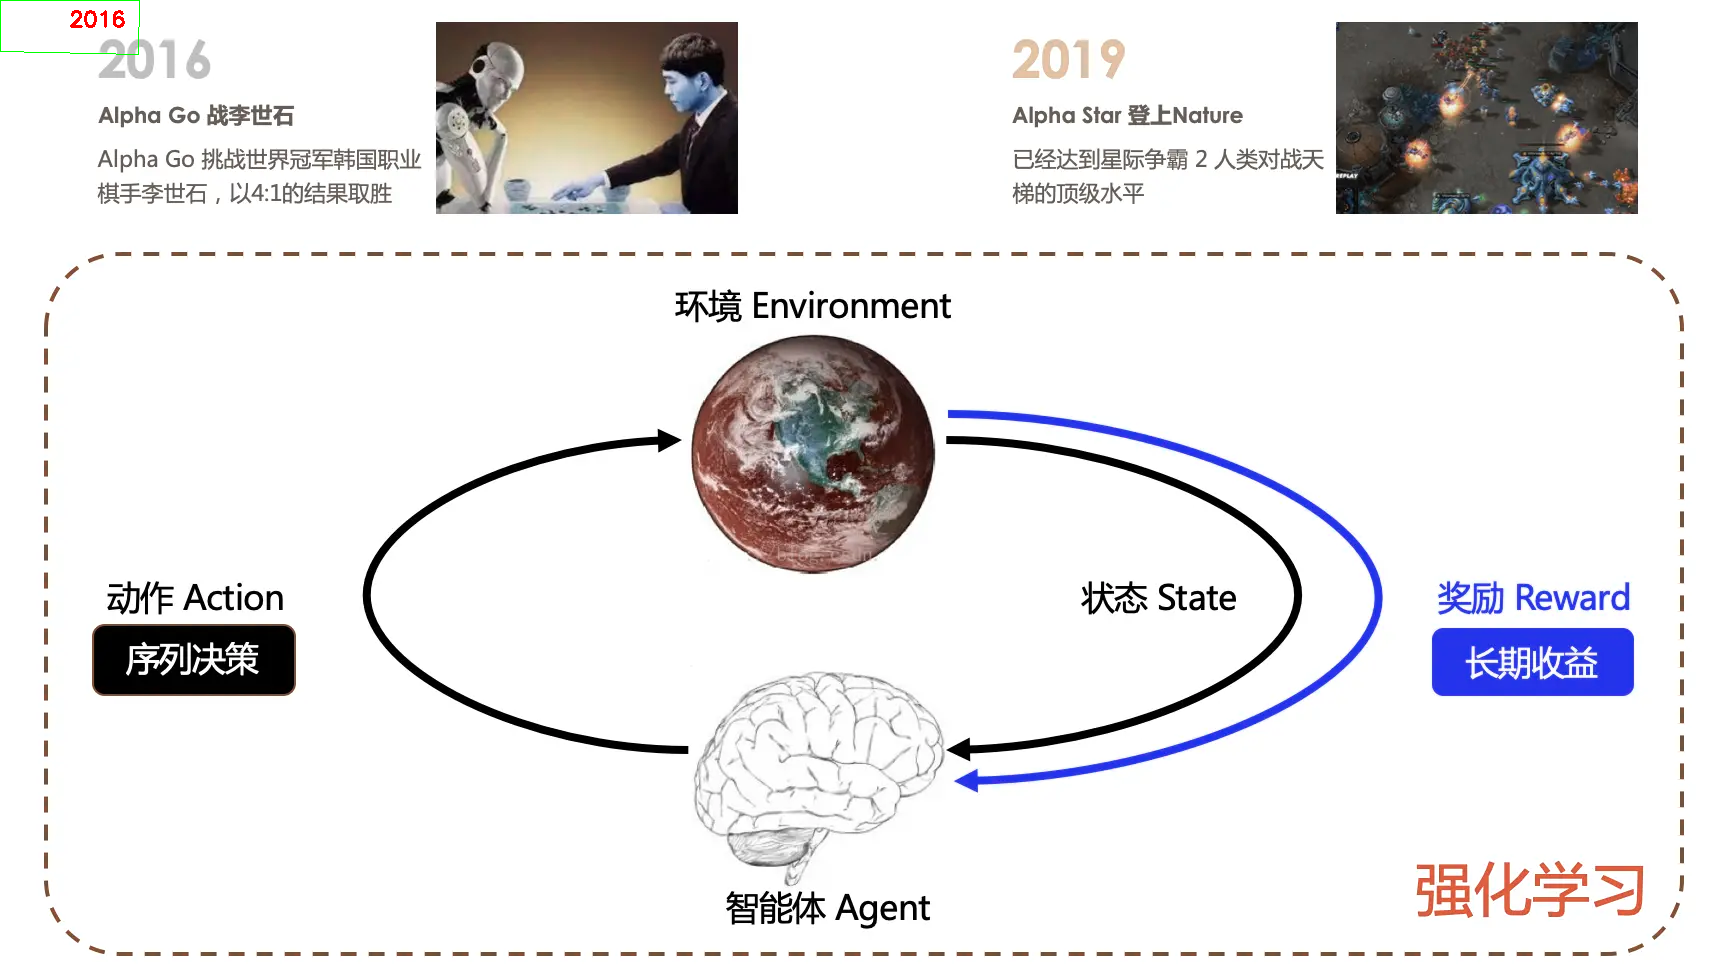

In [16]:
img = cv2.imread(image_path)
box = np.asarray(dt_polys[0])

cv2.polylines(img, [box], True, (0, 255, 0), 1)

# 添加文本标签
center_x = int(np.mean(box[:, 0]))
center_y = int(np.mean(box[:, 1]))
cv2.putText(img, str(rec_texts[0]), (center_x, center_y), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
Image.fromarray(img)

#### PPOCRLabel数据标注

```
pip3 install PPOCRLabel
pip3 install trash-cli
export QT_QPA_PALTFORM=wayland # 可以考虑添加到系统环境变量中，避免多次输入
# 选择标签模式来启动
PPOCRLabel --lang ch  # 启动【普通模式】，用于打【检测+识别】场景的标签
PPOCRLabel --lang ch --kie True  # 启动 【KIE 模式】，用于打【检测+识别+关键字提取】场景的标签
```

#### gradio前端界面

In [7]:
import gradio as gr
import cv2
import json
import os
from paddleocr import PaddleOCR
import numpy as np
from PIL import Image
import base64

from gradio_ocr import OCRAnnotator

In [5]:
annotator = OCRAnnotator(API_URL)
annotator.perform_ocr(image_path)

'temp_annotation.jpg'

In [ ]:
# 创建标注器实例
annotator = OCRAnnotator()

def process_image(image):
    """处理上传的图像"""
    # 保存上传的图像
    if isinstance(image, str):
        image_path = image
    else:
        image_path = "uploaded_image.jpg"
        image.save(image_path)
    
    # 执行OCR
    result_image = annotator.perform_ocr(image_path)
    annotation_data = annotator.get_annotation_data()
    
    # 创建数据表格
    data_table = []
    for item in annotation_data:
        data_table.append([item["id"], item["text"], str(item["bbox"])])
    
    return result_image, data_table

def update_text_handler(id, new_text):
    """更新文本处理器"""
    success = annotator.update_text(id, new_text)
    if success:
        result_image = annotator._create_annotation_image()
        annotation_data = annotator.get_annotation_data()
        
        data_table = []
        for item in annotation_data:
            data_table.append([item["id"], item["text"], str(item["bbox"])])
        
        return result_image, data_table, f"文本ID {id} 更新成功"
    else:
        return gr.update(), gr.update(), f"文本ID {id} 更新失败"

def delete_box_handler(id):
    """删除框处理器"""
    success = annotator.delete_box(id)
    if success:
        result_image = annotator._create_annotation_image()
        annotation_data = annotator.get_annotation_data()
        
        data_table = []
        for item in annotation_data:
            data_table.append([item["id"], item["text"], str(item["bbox"])])
        
        return result_image, data_table, f"框ID {id} 删除成功"
    else:
        return gr.update(), gr.update(), f"框ID {id} 删除失败"

def save_annotations_handler():
    """保存标注结果"""
    if not annotator.current_boxes:
        return "没有可保存的标注数据"
    
    output_dir = "annotations"
    os.makedirs(output_dir, exist_ok=True)
    
    base_name = os.path.splitext(os.path.basename(annotator.image_path))[0]
    json_path = os.path.join(output_dir, f"{base_name}_annotations.json")
    
    json_path, txt_path = annotator.save_annotations(json_path)
    return f"标注结果已保存:\nJSON: {json_path}\nTXT: {txt_path}"

# 创建Gradio界面 :cite[2]:cite[6]
with gr.Blocks(title="OCR数据标注系统") as demo:
    gr.Markdown("# OCR数据标注系统")
    gr.Markdown("上传图片进行OCR识别，然后对识别结果进行标注和编辑")
    
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(label="上传图片", type="filepath")
            process_btn = gr.Button("执行OCR识别", variant="primary")
            
            with gr.Row():
                text_id_input = gr.Number(label="文本ID", precision=0)
                new_text_input = gr.Textbox(label="新文本内容")
            
            with gr.Row():
                update_text_btn = gr.Button("更新文本")
                delete_box_btn = gr.Button("删除框")
            
            save_btn = gr.Button("保存标注结果", variant="secondary")
        
        with gr.Column():
            image_output = gr.Image(label="识别结果")
            data_table = gr.Dataframe(
                headers=["ID", "识别文本", "坐标框"],
                label="识别结果表格"
            )
            message_output = gr.Textbox(label="操作消息", interactive=False)
    
    # 事件绑定
    process_btn.click(
        fn=process_image,
        inputs=image_input,
        outputs=[image_output, data_table]
    )
    
    update_text_btn.click(
        fn=update_text_handler,
        inputs=[text_id_input, new_text_input],
        outputs=[image_output, data_table, message_output]
    )
    
    delete_box_btn.click(
        fn=delete_box_handler,
        inputs=text_id_input,
        outputs=[image_output, data_table, message_output]
    )
    
    save_btn.click(
        fn=save_annotations_handler,
        outputs=message_output
    )

if __name__ == "__main__":
    demo.launch(server_name="0.0.0.0", server_port=7860, share=True)

* Running on local URL:  http://0.0.0.0:7860

Could not create share link. Missing file: /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.3
3. Move the file to this location: /root/.cache/huggingface/gradio/frpc
